# Question 1&2

# Question 1 : Exhaustive Search

To solve the subset sum problem using **exhaustive search**, we need to explore all possible subsets of the given set and check which subset(s) sum up to the given target value t.

**Problem Summary :**

Given a set of positive integers S = {x₁, x₂, ..., xₙ} and a target sum t, we want to find a subset of S whose elements sum exactly to t.

**Explanation**

The exhaustive search strategy works by considering every combination of elements in the set — which is equivalent to going through all 2ⁿ possible subsets. At each step, we decide whether to include the current element in our subset or not. This can be represented as a binary tree where each level corresponds to one element in the set.

The iterative pseudo-code provided in the image can be translated into a recursive algorithm. At each step of the recursion, we have two choices:

Include the current element in the subset.

Exclude the current element and move to the next.

We stop the recursion if:

The sum becomes equal to t (solution found).

All elements have been considered (base case of recursion)

**Pseudo Code**

To find a subset of a given set S such that the sum of its elements equals a target value t using recursive exhaustive search.

**Recursive Strategy :**

At each step:

Either include the current element in the subset, or

Exclude it and continue the search.

In [ ]:
function EXHAUSTIVE_SUBSET_SUM(S, t, index, current_subset):
    if sum(current_subset) == t:
        return current_subset

    if index == length(S):
        return NULL

    // Case 1: Include S[index]
    result = EXHAUSTIVE_SUBSET_SUM(S, t, index + 1, current_subset + [S[index]])
    if result ≠ NULL:
        return result

    // Case 2: Exclude S[index]
    return EXHAUSTIVE_SUBSET_SUM(S, t, index + 1, current_subset)


**Time Complexity**

The time complexity of this exhaustive approach is O(2ⁿ), where n is the size of the input set S, because it evaluates all possible subsets.

This method guarantees finding a correct solution if one exists, but is not efficient for large inputs — dynamic programming or greedy methods are usually preferred for performance-critical applications.


# Question 2 : Dynamic Programming


**Dynamic Programming Explanation (Bottom-Up Approach)**

The iterative pseudocode using subsets is exhaustive and can be inefficient for large sets. Instead, dynamic programming offers a more efficient bottom-up approach to solve the Subset Sum Problem.

The key idea is:

Start by considering smaller subproblems — the target values t' = 0, 1, 2, ..., t — and iteratively build up the solution.

At each step, track which sums are possible using the current subset of elements.

**What sums become possible when adding xₖ₊₁?**

If we already know all the possible sums that can be formed using the subset {x₁, x₂, ..., xₖ}, then adding xₖ₊₁ to the set allows us to form new sums by adding xₖ₊₁ to each of the existing possible sums.

For example, if the possible sums before adding xₖ₊₁ are:

In [ ]:
P = {0, 3, 5}

And xₖ₊₁ = 4, then new sums that become possible are:

In [ ]:
P ∪ {0 + 4, 3 + 4, 5 + 4} = {0, 3, 5, 4, 7, 9}

#  Bottom-Up DP Approach to Solve SSP

**Algorithm**

In [ ]:
1. Initialize dp[0] = True, all others dp[i] = False
2. For each element x in the set S:
     For i from t down to x:
         if dp[i - x] is True:
             dp[i] = True
3. Return dp[t]



**Conclusion**

This bottom-up approach avoids recalculating overlapping subproblems and significantly improves efficiency over exhaustive search. It runs in O(n * t) time and uses O(t) space, where n is the number of elements and t is the target sum.

# Part 1: Data Generator

In [ ]:
from random import randint, sample

def get_S_t(n, MAX_X=100):
    S = [randint(1, MAX_X) for _ in range(n)]
    t = sum(sample(S, randint(1, n)))
    return S, t

S, t = get_S_t(10)
print("S:", S)
print("Target t:", t)

S: [32, 50, 45, 40, 93, 82, 77, 83, 91, 28]
Target t: 428


# Part 2: Recursive Exhaustive Search (Brute Force)

In [ ]:
def subset_sum_recursive(S, t):
    def dfs(i, target):
        if target == 0:
            return True
        if i < 0:
            return False
        if S[i] > target:
            return dfs(i - 1, target)
        return dfs(i - 1, target) or dfs(i - 1, target - S[i])

    return dfs(len(S) - 1, t)

# Test Recursive Approach: 5 Random Examples

In [3]:
print("\n Testing Recursive Brute Force Approach")

for test_case in range(1, 6):
    S, t = get_S_t(10)
    result = subset_sum_recursive(S, t)
    print(f"\nTest Case {test_case}")
    print("S:", S)
    print("Target:", t)
    print("Result:", result)



 Testing Recursive Brute Force Approach

Test Case 1
S: [39, 9, 16, 18, 2, 62, 77, 78, 3, 7]
Target: 78
Result: True

Test Case 2
S: [37, 33, 98, 30, 74, 83, 71, 60, 16, 10]
Target: 357
Result: True

Test Case 3
S: [10, 94, 63, 75, 75, 68, 80, 48, 91, 77]
Target: 412
Result: True

Test Case 4
S: [50, 70, 81, 29, 22, 70, 12, 31, 98, 51]
Target: 179
Result: True

Test Case 5
S: [6, 92, 88, 38, 95, 98, 69, 46, 81, 38]
Target: 237
Result: True


# Part 3: Memoization (Top-down Dynamic Programming)

In [ ]:
def subset_sum_memo(S, t):

    memo = {}

    def dp(i, target):
        if target == 0:
            return True
        if i == 0:
            return S[0] == target
        if (i, target) in memo:
            return memo[(i, target)]

     
        not_take = dp(i - 1, target)

       
        take = False
        if S[i] <= target:
            take = dp(i - 1, target - S[i])

        memo[(i, target)] = take or not_take
        return memo[(i, target)]

    return dp(len(S) - 1, t)

# Test Memoization Approach with 5 Examples

In [ ]:
print("\nTop Down Approach")

for test_case in range(1, 6):
    S, t = get_S_t(10)
    result = subset_sum_memo(S, t)
    print(f"\nTest Case {test_case}")
    print("S:", S)
    print("Target:", t)
    print("Result:", result)


Testing Memoization (Top-down DP) Approach

Test Case 1
S: [17, 44, 35, 87, 11, 41, 45, 94, 59, 87]
Target: 520
Result: True

Test Case 2
S: [13, 32, 54, 76, 19, 78, 69, 97, 68, 59]
Target: 552
Result: True

Test Case 3
S: [31, 83, 85, 98, 10, 62, 71, 80, 64, 23]
Target: 344
Result: True

Test Case 4
S: [42, 65, 96, 54, 17, 20, 18, 20, 40, 9]
Target: 195
Result: True

Test Case 5
S: [91, 20, 45, 57, 46, 15, 30, 1, 70, 54]
Target: 135
Result: True


# Part 4: Bottom-up Approach


In [ ]:
def subset_sum_bottom_up(S, t):
    n = len(S)

    dp = [[False] * (t + 1) for _ in range(n)]

    for i in range(n):
        dp[i][0] = True

    if S[0] <= t:
        dp[0][S[0]] = True

    for i in range(1, n):
        for target in range(1, t + 1):
            not_take = dp[i - 1][target]
            take = False
            if S[i] <= target:
                take = dp[i - 1][target - S[i]]
            dp[i][target] = take or not_take

    return dp[n - 1][t]

# Test Bottom-up Approach

In [ ]:
print("\nTesting Bottom-up Approach")

for test_case in range(1, 6):
    S, t = get_S_t(10)
    result = subset_sum_bottom_up(S, t)
    print(f"\nTest Case {test_case}")
    print("S:", S)
    print("Target:", t)
    print("Result:", result)


Testing Bottom-up Dynamic Programming Approach

Test Case 1
S: [77, 66, 11, 44, 2, 66, 99, 45, 38, 21]
Target: 100
Result: True

Test Case 2
S: [60, 88, 52, 39, 49, 89, 64, 93, 72, 91]
Target: 697
Result: True

Test Case 3
S: [32, 34, 96, 77, 15, 2, 86, 46, 17, 45]
Target: 244
Result: True

Test Case 4
S: [20, 95, 33, 44, 31, 78, 58, 36, 43, 41]
Target: 273
Result: True

Test Case 5
S: [29, 82, 83, 22, 31, 100, 12, 74, 31, 99]
Target: 510
Result: True


# Visualizations

# Plot 1: Time Complexity Comparison 

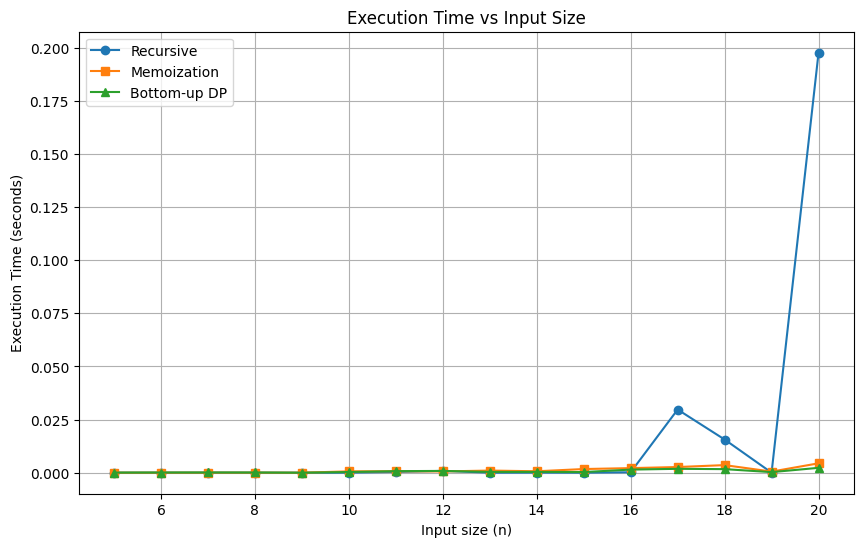

In [ ]:
import time
import matplotlib.pyplot as plt

sizes = list(range(5, 21))
recursive_times = []
memo_times = []
bottom_up_times = []

for n in sizes:
    S, t = get_S_t(n)

    start = time.time()
    subset_sum_recursive(S, t)
    recursive_times.append(time.time() - start)

    start = time.time()
    subset_sum_memo(S, t)
    memo_times.append(time.time() - start)

    start = time.time()
    subset_sum_bottom_up(S, t)
    bottom_up_times.append(time.time() - start)

plt.figure(figsize=(10, 6))
plt.plot(sizes, recursive_times, label='Recursive', marker='o')
plt.plot(sizes, memo_times, label='Memoization', marker='s')
plt.plot(sizes, bottom_up_times, label='Bottom-up DP', marker='^')
plt.xlabel('Input size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Input Size')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Subset Sum Possibility Heatmap (for fixed S)

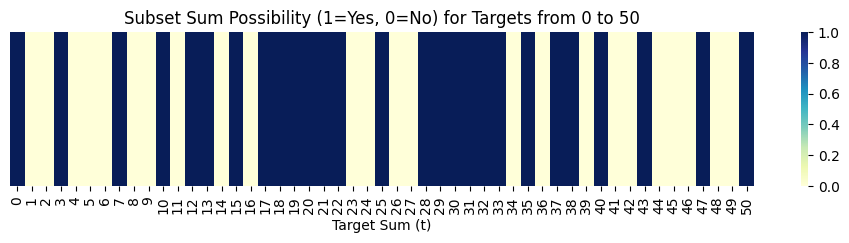

In [9]:
import seaborn as sns
import numpy as np

S = [3, 7, 10, 12, 18]
t_max = sum(S)
results = [subset_sum_bottom_up(S, t) for t in range(t_max + 1)]

plt.figure(figsize=(12, 2))
sns.heatmap([results], cmap="YlGnBu", cbar=True, xticklabels=range(t_max + 1))
plt.title("Subset Sum Possibility (1=Yes, 0=No) for Targets from 0 to {}".format(t_max))
plt.xlabel("Target Sum (t)")
plt.yticks([], [])
plt.show()

# Plot 3: Random Subset Distribution Histogram

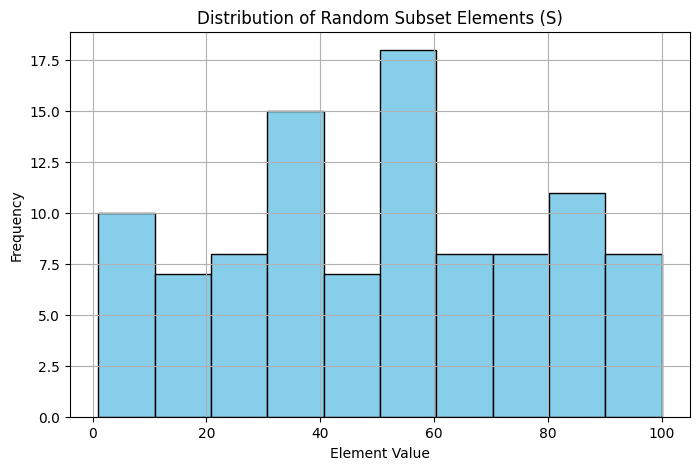

In [10]:
S, _ = get_S_t(100)
plt.figure(figsize=(8, 5))
plt.hist(S, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Random Subset Elements (S)")
plt.xlabel("Element Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot 4: Success Rate Sum (Over 100 Trials)

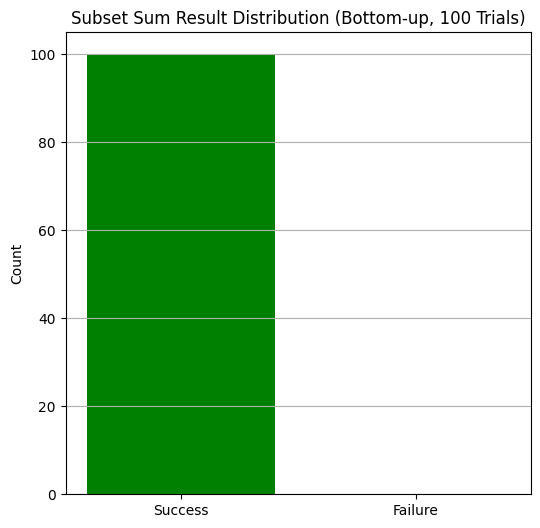

In [11]:
success_count = 0
trials = 100

for _ in range(trials):
    S, t = get_S_t(10)
    if subset_sum_bottom_up(S, t):
        success_count += 1

success_rate = success_count / trials

plt.figure(figsize=(6, 6))
plt.bar(["Success", "Failure"], [success_count, trials - success_count], color=["green", "red"])
plt.title("Subset Sum Result Distribution (Bottom-up, 100 Trials)")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()

# Conclusion :
Subset Sum Problem (SSP) is a simple problem that is employed to compare brute-force search with dynamic programming. Brute-force search approach systematically checks all subsets to find a sum equal to the value t. Though it works, its exponential complexity makes it infeasible for large inputs. Dynamic programming (DP) solution, however, efficiently solves SSP by building solutions of smaller subproblems step by step. It uses a bottom-up approach to maintaining viable sums to t, reducing redundant computation significantly. This shift from exponential to pseudo-polynomial time makes the DP method very scalable and usable in practical applications. In general, the DP method not only optimizes performance but also demonstrates how classical algorithm design principles can transform computational feasibility.



## List of References

Cormen, T.H., Leiserson, C.E., Rivest, R.L. and Stein, C., 2009. Introduction to Algorithms. 3rd ed. MIT Press.

Kleinberg, J. and Tardos, É., 2006. Algorithm Design. 1st ed. Pearson Education.

Dasgupta, S., Papadimitriou, C.H. and Vazirani, U.V., 2006. Algorithms. McGraw-Hill.